In [3]:
import pydicom
import pylibjpeg
import gdcm
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from IPython.display import display_html

Select examples images

- All types of view
- All laterality
- With cancer, difficult case and without
- 

Techniques
- **Image Enhancement**: Preprocessing techniques such as histogram equalization, contrast enhancement, and denoising have been applied to medical images to enhance image quality and reduce noise.
- **Segmentation**: Separating an image into different regions or objects of interest. Segmentation is used to identify the region of interest in medical images, such as tumors or other abnormalities in breast images. Segmentation techniques include thresholding, region growing, active contours, and deep learning-based methods.
- **Registration**: Image registration is the process of aligning two or more images in the same coordinate system. This technique is commonly used to compare images taken at different times or from different perspectives. In breast imaging, registration techniques are used to align images from different modalities, such as mammography and ultrasound.
- **Feature Extraction**: Feature extraction involves extracting relevant features from an image that can be used for classification or analysis. In medical imaging, feature extraction techniques are used to extract features such as texture, shape, and size of lesions or other abnormalities.

In [4]:
data_samples = pd.read_csv('train_samples_1.csv').set_index('Unnamed: 0')
data_samples.index.name = 'index'
data_samples

,patient_id,laterality,image_id,view,age,cancer,biopsy,invasive,BIRADS,implant,density,difficult_negative_case,path
index,,,,,,,,,,,,,
0,5698,0,508015262,5,57.0,0,0,0,0.0,0,1,1.0,./256px/5698_508015262.png
1,5698,0,661831208,1,57.0,0,0,0,0.0,0,1,1.0,./256px/5698_661831208.png
2,5698,0,1083274745,1,57.0,0,0,0,0.0,0,1,1.0,./256px/5698_1083274745.png
3,5698,0,1888447274,5,57.0,0,0,0,0.0,0,1,1.0,./256px/5698_1888447274.png
4,5698,1,250593308,5,57.0,0,0,0,-1.0,0,1,0.0,./256px/5698_250593308.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,7445,1,1010089340,1,67.0,0,0,0,2.0,0,0,0.0,./256px/7445_1010089340.png
300,55763,0,1691058458,5,61.0,0,0,0,0.0,0,1,1.0,./256px/55763_1691058458.png
301,55763,0,1954720347,1,61.0,0,0,0,0.0,0,1,1.0,./256px/55763_1954720347.png


In [24]:
def read_img(path, n_channels = 1):
    if path.endswith('.dcm'):
        img = pydicom.dcmread(path).pixel_array
    else:
        img = np.array(Image.open(path))
    if img.shape[0] < n_channels:
        img = np.tile(img, (n_channels,1,1))
    return img

def plot_img(img,ax=plt,cmap='turbo', show=False, **kwargs):
    ax.axis("off")
    ax.imshow(img, cmap=cmap,**kwargs)
    if show:
        plt.show()

def plot_patient(dataframe,patient_id):
    patient_info = dataframe[dataframe['patient_id'] == patient_id]
    nrows = len(patient_info)//5 + 1
    ncols = 5
    fig, axs = plt.subplots(nrows, ncols, figsize=(min(20,ncols*5),nrows*5))
    plt.subplots_adjust(hspace=0.7)
    axs = axs.flatten()
    for ax in axs:
        ax.axis("off")
    for k,(_,img_row) in enumerate(patient_info.iterrows()):
        path = img_row["path"]
        img = read_img(f'{path}')
        plot_img(img,ax=axs[k])
        axs[k].set_title(f"{img_row}",fontsize = 8, weight=None,y=-0.60)


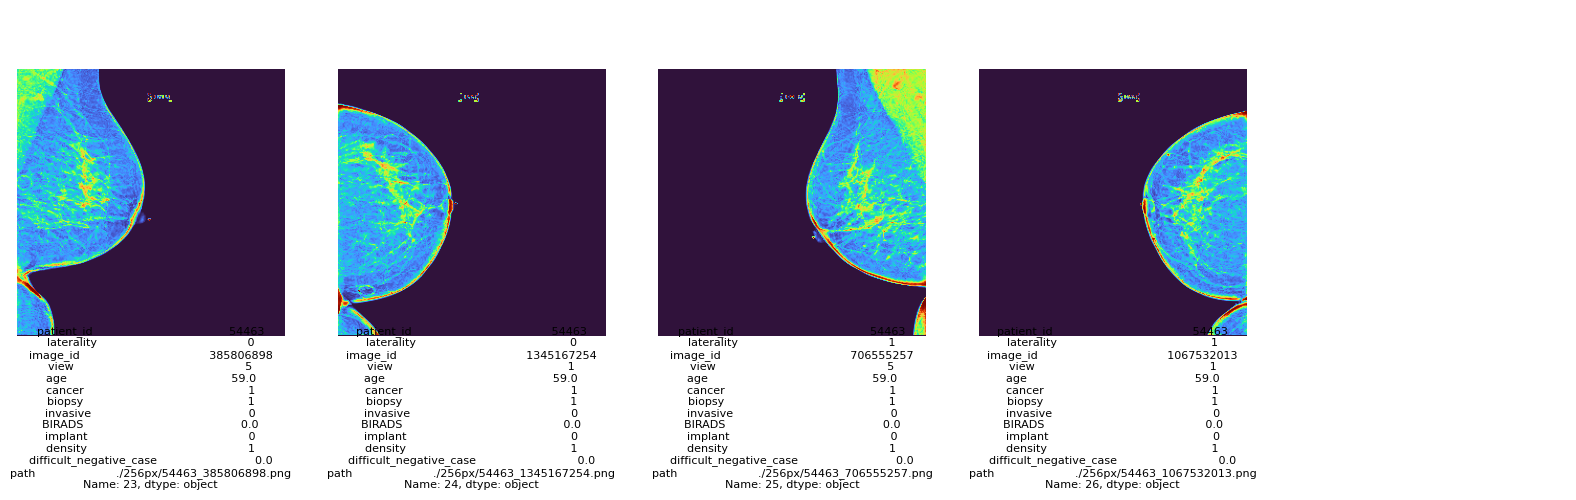

In [6]:
plot_patient(data_samples,54463)

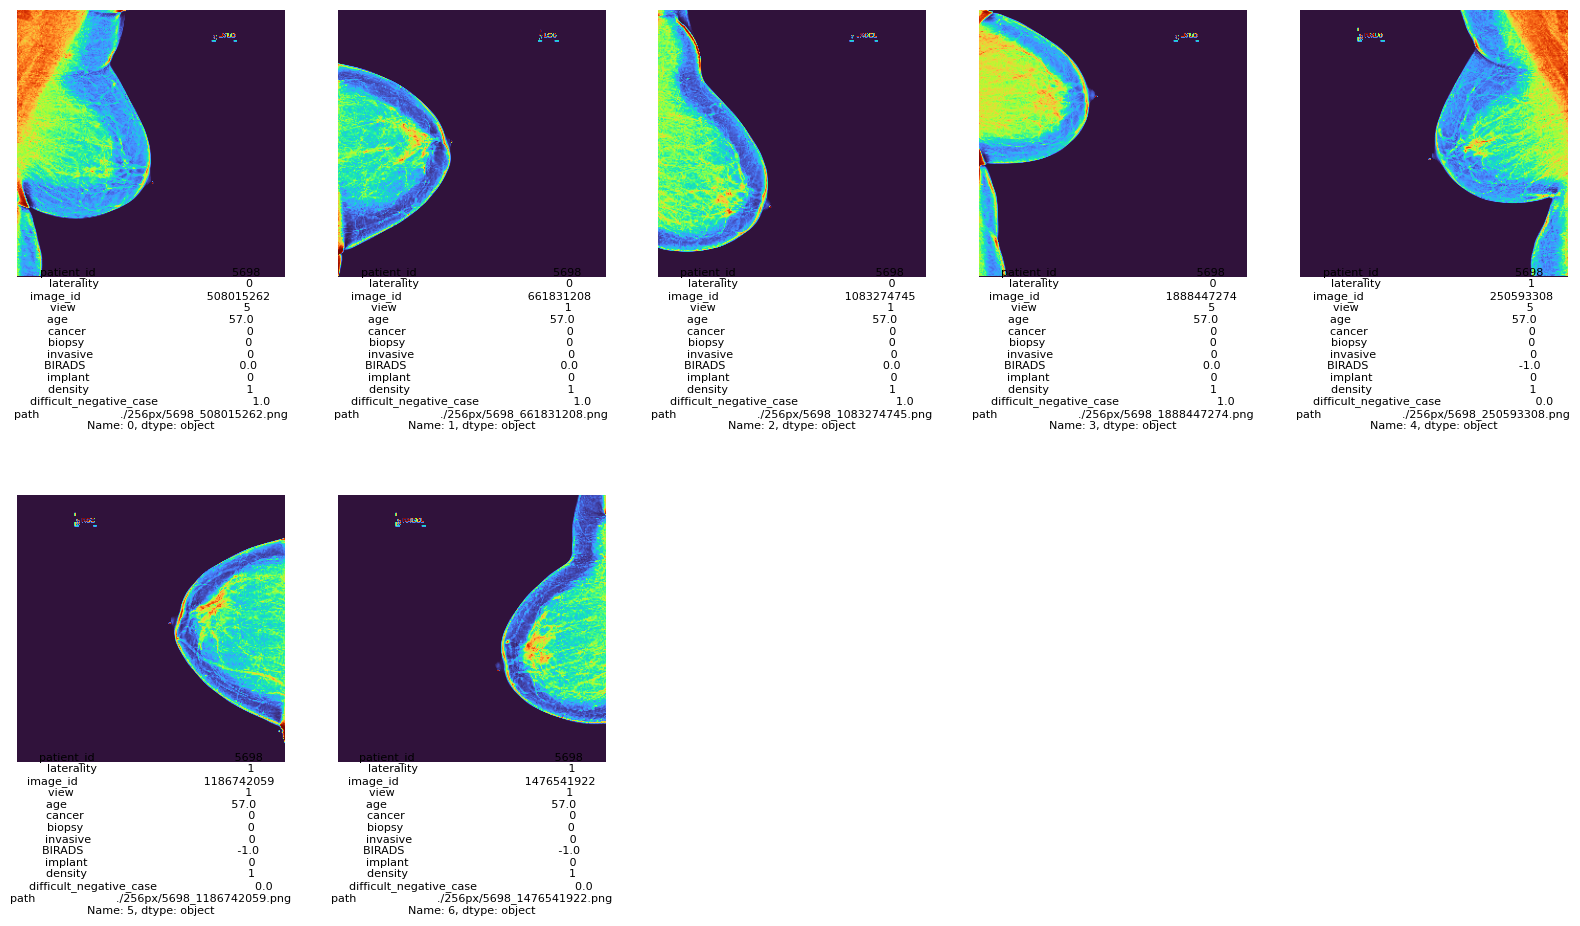

In [7]:
plot_patient(data_samples,5698)

In [8]:
data_samples[data_samples['difficult_negative_case'] == 1]

,patient_id,laterality,image_id,view,age,cancer,biopsy,invasive,BIRADS,implant,density,difficult_negative_case,path
index,,,,,,,,,,,,,
0,5698,0,508015262,5,57.0,0,0,0,0.0,0,1,1.0,./256px/5698_508015262.png
1,5698,0,661831208,1,57.0,0,0,0,0.0,0,1,1.0,./256px/5698_661831208.png
2,5698,0,1083274745,1,57.0,0,0,0,0.0,0,1,1.0,./256px/5698_1083274745.png
3,5698,0,1888447274,5,57.0,0,0,0,0.0,0,1,1.0,./256px/5698_1888447274.png
9,25930,1,486563646,5,55.0,0,0,0,0.0,0,2,1.0,./256px/25930_486563646.png
10,25930,1,1101603755,1,55.0,0,0,0,0.0,0,2,1.0,./256px/25930_1101603755.png
46,52148,0,339845989,1,58.0,0,0,0,0.0,0,2,1.0,./256px/52148_339845989.png
47,52148,0,1278355760,5,58.0,0,0,0,0.0,0,2,1.0,./256px/52148_1278355760.png
63,1511,0,503850980,5,63.0,0,0,0,0.0,0,2,1.0,./256px/1511_503850980.png


Read in images

In [57]:
img = cv2.imread('/Volumes/Seagate Portable Disk/University of Manitoba/Data Science/Datasets/RSNA Breast Cancer/rsna-1024-pngs/1357_553589978.png')
# cv2.bilateralFilter(img, 9, 75, 75)
# cv2.imshow('test',img)
# cv2.waitKey(0)
# img.max(2).shape

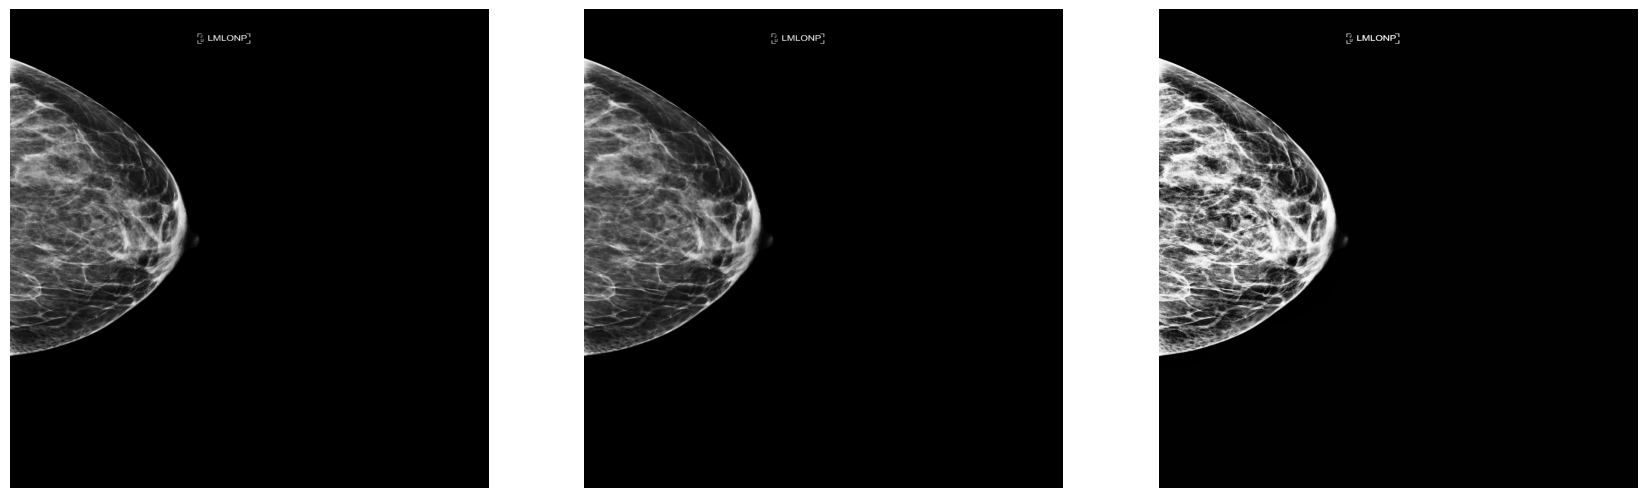

In [59]:
img0 = img
img1 = cv2.bilateralFilter(img0, 5, 25, 25)
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img2 = clahe.apply(gray)

imgs = [img0,img1,img2]
fig, axs = plt.subplots(int(np.ceil(len(imgs)/5)), min(len(imgs),5), figsize=(min(25,len(imgs)*7),1*7))
axs = axs.flatten()
for i,ax_i in enumerate(axs):
    ax_i.axis('off')
    if i < len(imgs):
        plot_img(imgs[i],ax_i,cmap='Greys_r', show=False)



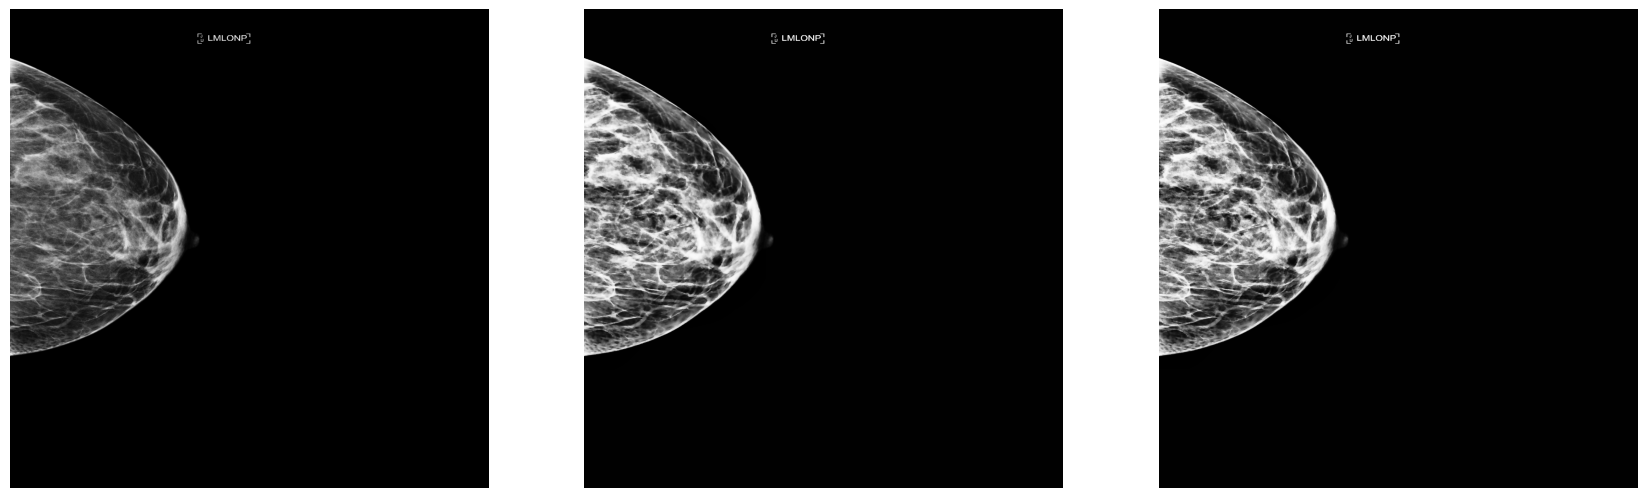

In [60]:
img0 = img
img3 = cv2.bilateralFilter(img2, 5, 25, 25)
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img4 = clahe.apply(gray)
imgs = [img0,img3,img4]

fig, axs = plt.subplots(int(np.ceil(len(imgs)/5)), min(len(imgs),5), figsize=(min(25,len(imgs)*7),1*7))
axs = axs.flatten()
for i,ax_i in enumerate(axs):
    ax_i.axis('off')
    if i < len(imgs):
        plot_img(imgs[i],ax_i,cmap='Greys_r', show=False)

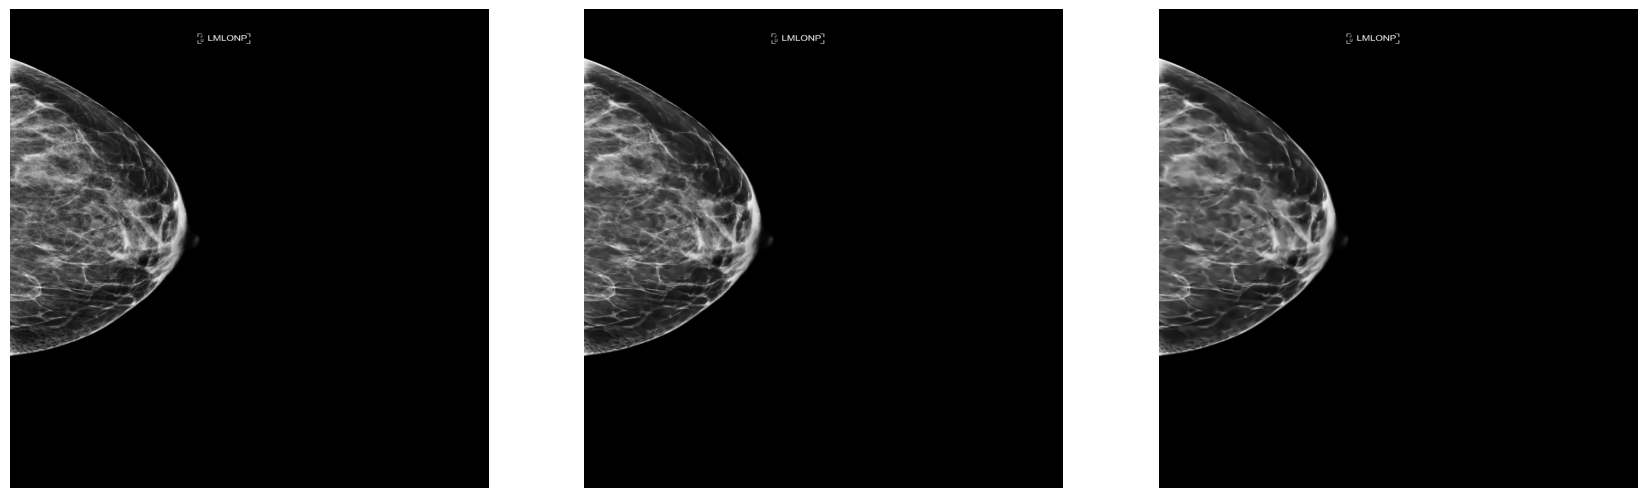

In [62]:
img0 = img
img5 = cv2.fastNlMeansDenoising(img, None, 7, 7, 13) 
img6 = cv2.fastNlMeansDenoising(img, None, 11, 11, 13) 

imgs = [img0,img5,img6]

fig, axs = plt.subplots(int(np.ceil(len(imgs)/5)), min(len(imgs),5), figsize=(min(25,len(imgs)*7),1*7))
axs = axs.flatten()
for i,ax_i in enumerate(axs):
    ax_i.axis('off')
    if i < len(imgs):
        plot_img(imgs[i],ax_i,cmap='Greys_r',show=False)